In [ ]:
importimport matplotlib.pyplot as plt




In [ ]:
!pip install river

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 14.4 MB/s 


In [ ]:
import river
dir(river.neural_net.activations)

['Activation',
 'Identity',
 'ReLU',
 'Sigmoid',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'abc',
 'np']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras import layers,models


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
IMG_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/potato_disease

/content/drive/.shortcut-targets-by-id/1d0uZ2V4ELdzh0FooASBLAYCX89sz7bb0/potato_disease


In [ ]:
dataset=tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE,IMG_SIZE),
    shuffle=True)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 2 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 2 0 0 2 1 0 1 1 1 0 1 1 0 0]


In [ ]:
input_shape=image_batch.shape

In [ ]:
input_shape

TensorShape([32, 256, 256, 3])

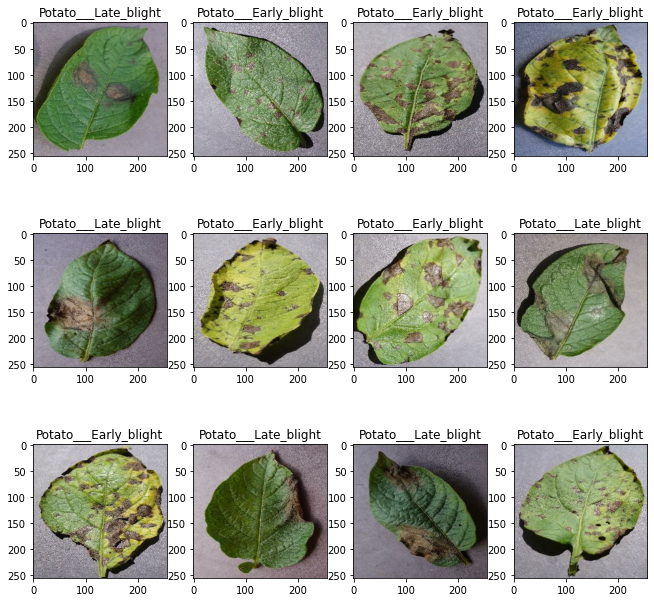

In [ ]:
plt.figure(figsize=(11,11))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        at=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
    

In [ ]:
len(dataset)

68

In [ ]:
def get_dataset_partitions(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=1000):
    df_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    val_size=int(val_split*df_size)
    train_size=int(train_split*df_size)
    
    train_ds=dataset.take(train_size)
    
    val_ds=(dataset.skip(train_size)).take(val_size)
    
    test_ds=(dataset.skip(train_size)).skip(val_size)
    
    
    
    return train_ds,test_ds,val_ds

In [ ]:
train_ds,test_ds,val_ds = get_dataset_partitions(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(test_ds)

8

In [ ]:
len(val_ds)

6

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
 layers.experimental.preprocessing.Rescaling(1/255), 
 layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE)   
])

In [ ]:
data_augmentation = tf.keras.Sequential([
 layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), 
 layers.experimental.preprocessing.RandomRotation(0.2)   
])

In [ ]:
model=tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
    
                          
])

In [ ]:
model.build(input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 259s 560ms/step - loss: 0.8729 - accuracy: 0.5584 - val_loss: 0.7771 - val_accuracy: 0.6354
Epoch 2/50
54/54 [==============================] - 5s 89ms/step - loss: 0.5566 - accuracy: 0.7569 - val_loss: 0.5500 - val_accuracy: 0.7500
Epoch 3/50
54/54 [==============================] - 5s 88ms/step - loss: 0.3877 - accuracy: 0.8229 - val_loss: 0.4114 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - 5s 87ms/step - loss: 0.2885 - accuracy: 0.8756 - val_loss: 0.5078 - val_accuracy: 0.7500
Epoch 5/50
54/54 [==============================] - 5s 89ms/step - loss: 0.3004 - accuracy: 0.8785 - val_loss: 0.4952 - val_accuracy: 0.8021
Epoch 6/50
54/54 [==============================] - 6s 102ms/step - loss: 0.2336 - accuracy: 0.9097 - val_loss: 0.2718 - val_accuracy: 0.9167
Epoch 7/50
54/54 [==============================] - 5s 88ms/step - loss: 0.1894 - accuracy: 0.9311 - val_loss: 0.2624 - val_accuracy: 0.8802
Epoch 8/50
54/54 [==

In [ ]:
history

In [ ]:
type(history)

keras.callbacks.History

In [ ]:
history.params


{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
dict_keys=history.history
dict_keys

{'loss': [0.8729002475738525,
  0.5566153526306152,
  0.3877496123313904,
  0.288526713848114,
  0.3004308342933655,
  0.23361486196517944,
  0.1893850564956665,
  0.20438051223754883,
  0.16819028556346893,
  0.15482255816459656,
  0.11809393763542175,
  0.09854747354984283,
  0.10624507814645767,
  0.09563738852739334,
  0.06497517228126526,
  0.06385809928178787,
  0.08981627225875854,
  0.06813771277666092,
  0.046518582850694656,
  0.08175622671842575,
  0.05755728855729103,
  0.06767290085554123,
  0.06143180653452873,
  0.037872981280088425,
  0.14556843042373657,
  0.0846894308924675,
  0.07806315273046494,
  0.04901944845914841,
  0.03512663394212723,
  0.029837312176823616,
  0.05921640247106552,
  0.04647335782647133,
  0.02777658775448799,
  0.03331943601369858,
  0.0354902483522892,
  0.038927529007196426,
  0.0229626577347517,
  0.022231968119740486,
  0.029059402644634247,
  0.04164331778883934,
  0.04058559238910675,
  0.028674686327576637,
  0.030086204409599304,
  0.0

In [ ]:

acc=dict_keys['accuracy']
val_acc=dict_keys['val_accuracy']
loss=dict_keys['loss']
val_loss=dict_keys['val_loss']

Text(0.5, 1.0, 'training loss vs validation loss')

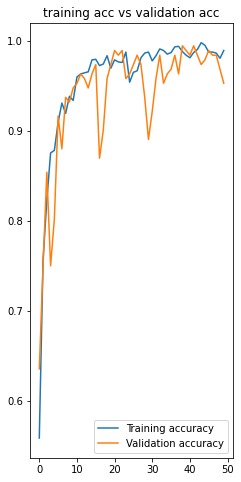

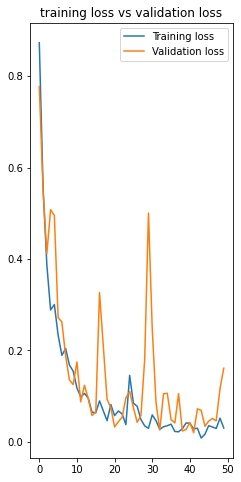

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation accuracy")
plt.legend(loc='lower right')
plt.title("training acc vs validation acc")

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training loss")
plt.plot(range(EPOCHS),val_loss,label="Validation loss")
plt.legend(loc='upper right')
plt.title("training loss vs validation loss")

1/1 [==============================] - 0s 156ms/step
Potato___Early_blight


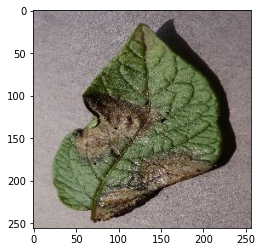

In [ ]:
for img_batch,label_batch in test_ds.take(1):
    img=img_batch[0].numpy().astype('uint8')
    plt.imshow(img)
    batch_prediction=model.predict(img_batch)
    print(class_names[np.argmax(batch_prediction[0])])